In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


import numpy as np
from ipywidgets import widgets
import matplotlib.pyplot as plt

from mpmath import mp
mp.dps = 50


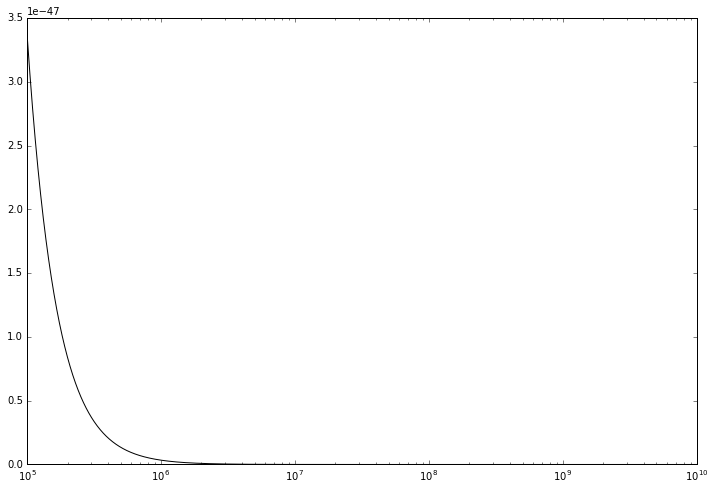

<function __main__.plot_spec>

In [3]:
t= np.arange(0,1,0.01)
# K_b*T at RT is 4.04*10**-21 J

def spec(f,k,V,t,T):
    t_n = t*np.exp(k*V/(4.04*10**-21*(T/298.)))
    return (2 * t_n)/(np.pi* (1+np.square(t_n*f)))

def F1(f,b,T2):
    w_p = 2.865E9 + 28E6*b
    w_n = 2.865E9 - 28E6*b
    k = 1/T2
    return (1/np.pi)*( k/(k**2 + np.square(f-w_p)) + k/(k**2 + np.square(f-w_n)))
    
def plot_spec(k,r,t_exp,b,T):
    f = np.logspace(5,10,2000)
    t = 10**t_exp
    V = (4/3.0)*np.pi*(r*10**-9)**3
    T2 = 500E-9
    plt.semilogx(f,spec(f,k,V,t,T),'k-')
    #R = np.arange(1,10,0.1)
    #plt.semilogy(R,spec(3E9,k,(4/3.0)*np.pi*(R*10**-9)**3,t),'k-')
    #plt.semilogy(R,spec(5E6,k,(4/3.0)*np.pi*(R*10**-9)**3,t),'r-')
    plt.show()

    
widgets.interact(plot_spec,k=(10**4,4*10**4,10**2),r=(1,25,0.1),t_exp=(-13,-9,0.1),b=(0,100,0.5),T=(5,300,1))

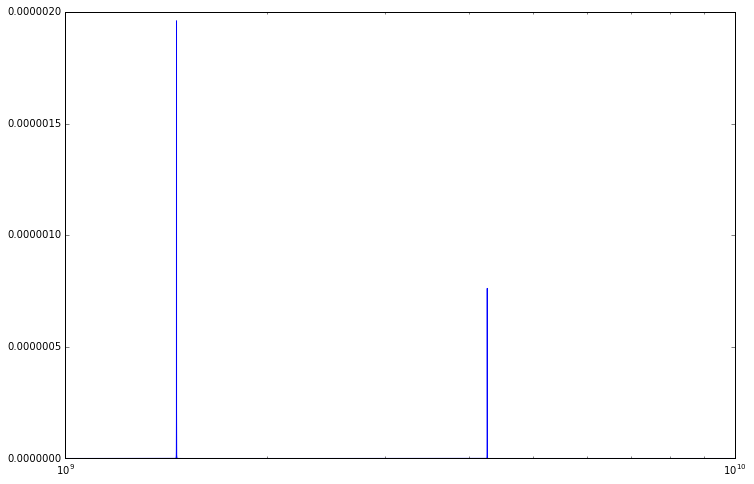

<function __main__.plot_f1>

In [4]:
mp.dps = 20
def F1(f,b,T2):
    w_p = mp.mpf(2.865E9 + 28E6*b)
    w_n = mp.mpf(2.865E9 - 28E6*b)
    k = mp.mpf(1/T2)
    return (1/mp.pi)*( k/(k**2 + (f-w_p)**2) + k/(k**2 + (f-w_n)**2))

def plot_f1(b,T2):
    f = np.logspace(9,10,20000)
    T2 = mp.mpf(T2*10E-9)
    plt.semilogx(f,np.array(F1(f,b,T2)),'b-')
    plt.show()
    
widgets.interact(plot_f1,b=(0,100,0.5),T2=(50,5000,1))

In [5]:
mp.dps = 20

T2 = mp.mpf(1500E-9)
b = 10
k =  mp.mpf(26E3)
t =  mp.mpf(10**-11)
V =  mp.mpf(4/3.0*np.pi*(5.2E-9)**3)

def spec(f,k,V,t):
    t_n = t*mp.exp(k*V/(mp.mpf(4.04*10**-21)))
    return mp.mpf((2 * t_n)/(mp.pi*(1+mp.power(2,t_n*f))))

def F1(f,b,T2):
    w_p = mp.mpf(2.865E9 + 28E6*b)
    w_n = mp.mpf(2.865E9 - 28E6*b)
    k = mp.mpf(1/T2)
    return mp.mpf((1/mp.pi)*( k/(k**2 + mp.power(f-w_p,2)) + k/(k**2 + mp.power(f-w_n,2))))

def F2(f,tau):
    return (1/(4*mp.pi**2)) * (2/tau) * mp.sin(2*mp.pi*tau*f/4.)**4 / (f/4.)**2
#
#def R(f):
#    return F1(f,b,T2)*spec(f,k,V,t)*10**15

#print integrate.quad(R,10E3,10E11)


i = lambda f: F1(f,b,T2)*spec(f,k,V,t)
print mp.quad(i,[10E3,10E11])


1.2265479377576260052e-11


In [6]:
G_ext = 1/700E-9 - 1/15E-6
B2 = G_ext / (28E6**2*714*10**-15)
print np.sqrt(B2)

49.3249021033


In [7]:
def b_var(T2,t_exp,k,r):
    b=0
    k =  mp.mpf(k)
    t =  mp.mpf(10**t_exp)
    T1 = mp.mpf(50*1E-6)
    T2 = mp.mpf(T2*1E-9)
    V =  mp.mpf(4/3.0*np.pi*(r*1E-9)**3)
    i = lambda f: F1(f,b,T2)*spec(f,k,V,t)
    S = mp.quad(i,[1E8,2.765E9,2.965E9,1E10])
    G_ext = mp.mpf(1/mp.mpf(2770E-9)  - 1/T1)
    B2 = mp.mpf( G_ext / (mp.mpf(28E6)**2*S))
    
    tau = 1E-7
    i2 = lambda f: F2(f,tau*2)*spec(f,k,V,t)
    S2 = mp.quad(i2,[1E4,1/tau-1E6,1/tau+1E6,1E8])
    G_ext2 = mp.mpf(1/mp.mpf(225E-9)  - 1/T2)
    B2_2 = mp.mpf( G_ext2 / (mp.mpf(28E6)**2*S2))

    
    return (mp.sqrt(B2),mp.sqrt(B2_2))

widgets.interact(b_var,T2=(50,2500,0.1),t_exp=(-13,-9,0.1),k=(2E4,6E4,1E3),r=(1,10,0.1))

(mpf('1.681308890613766651556'), mpf('3.7801463492966208021175'))

<function __main__.b_var>

In [8]:
T2 = 1000
r = 3.5
k = np.linspace(1E4,5E4,30)
t = np.linspace(-12,-8,30)

b1 = np.zeros((30,30))
b2 = np.zeros((30,30))

for i,K in enumerate(k):
    for j,T in enumerate(t):
        
        b = b_var(T2,T,K,r)
        b1[i,j] = b[0]
        b2[i,j] = b[1]
        


In [9]:
t_n = np.zeros((30,30))
V = 4/3. * mp.pi * (3.5E-9)**3
for i,K in enumerate(k):
    for j,T in enumerate(t):
        t_n[i,j] = mp.mpf((10**T)*mp.exp(K*V/(4.04E-21)))

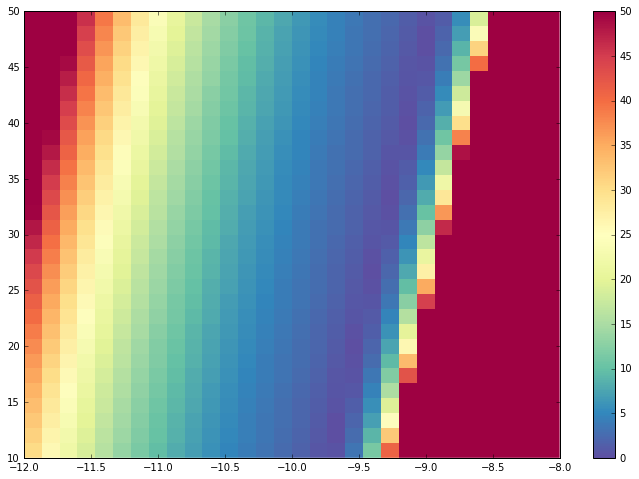

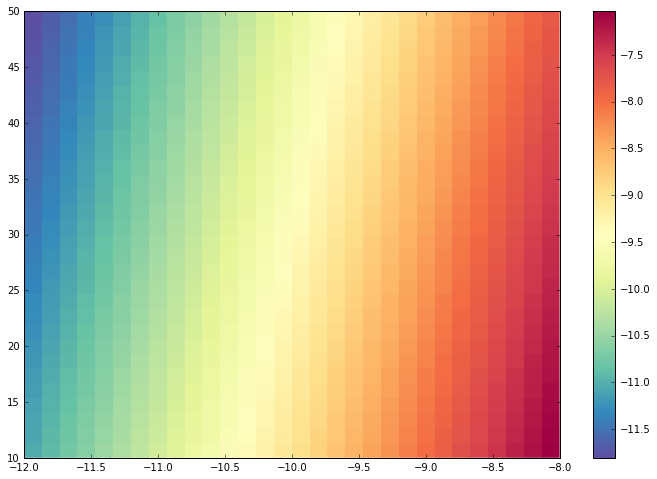

In [10]:
plt.imshow(np.abs(b2-b1),cmap=plt.get_cmap('Spectral_r'), interpolation='none', vmin=0, vmax=50,extent=[-12,-8,10,50],aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(np.log10(t_n),cmap=plt.get_cmap('Spectral_r'), interpolation='none',extent=[-12,-8,10,50],aspect='auto')
plt.colorbar()
plt.show()

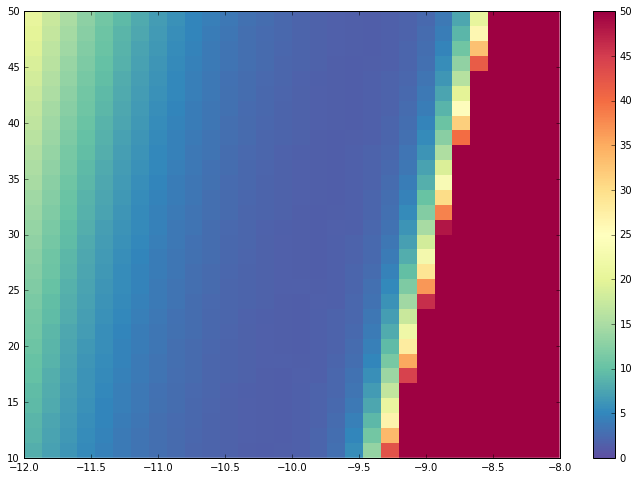

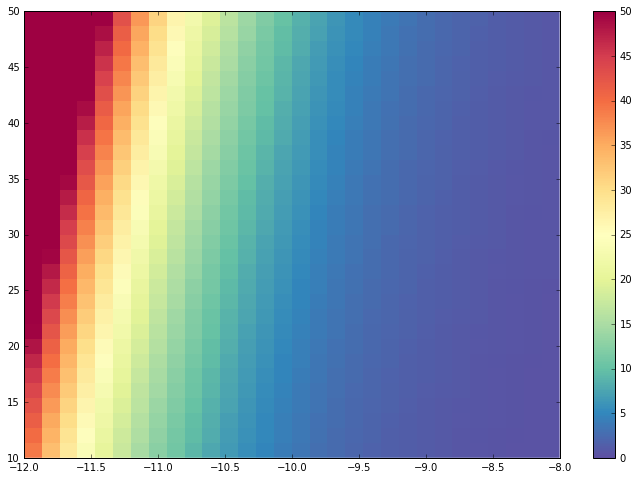

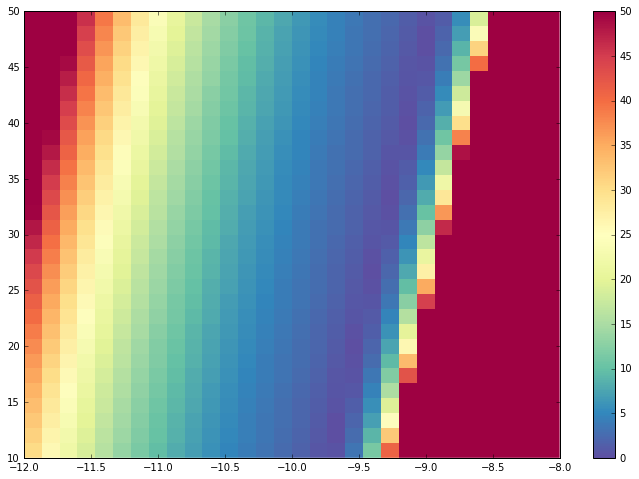

In [11]:
plt.imshow(b1,cmap=plt.get_cmap('Spectral_r'), interpolation='none', vmin=0, vmax=50,extent=[-12,-8,10,50],aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(b2,cmap=plt.get_cmap('Spectral_r'), interpolation='none', vmin=0, vmax=50,extent=[-12,-8,10,50],aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(np.abs(b2-b1),cmap=plt.get_cmap('Spectral_r'), interpolation='none', vmin=0, vmax=50,extent=[-12,-8,10,50],aspect='auto')
plt.colorbar()
plt.show()

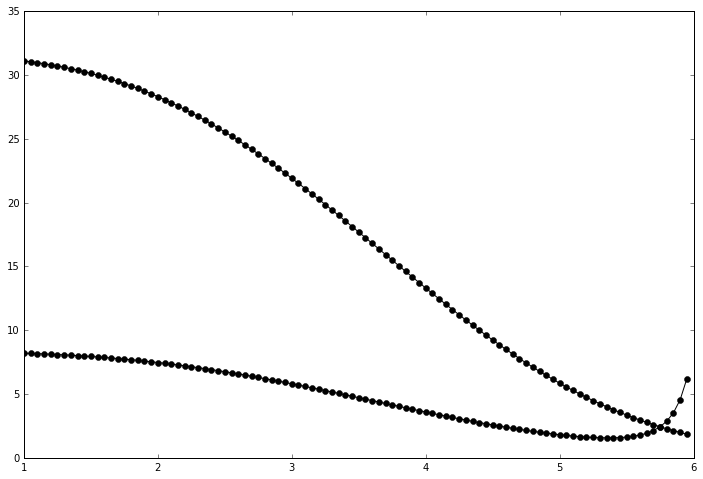

In [12]:
T2 = 500
T1 = 15
r = np.arange(1,6,0.05)
b = list( b_var(T2,-11,26000,R) for R in np.nditer(r))
plt.plot(r,b,'k-o')

In [13]:
-

SyntaxError: invalid syntax (<ipython-input-13-0a1f21a34173>, line 1)

In [ ]:
def T2_pred(tau,r,b_v):
    k =  mp.mpf(26E3)
    t =  mp.mpf(10**-9.2)
    T1 = mp.mpf(20*1E-6)
    T2 = mp.mpf(1000*1E-9)
    V =  mp.mpf(4/3.0*np.pi*(r*1E-9)**3)
    i = lambda f: F2(f,tau*2)*spec(f,k,V,t)
    S = mp.quad(i,[1E4,1/tau-1E6,1/tau+1E6,1E8])
    G_ext = mp.mpf(28E6**2*b_v**2*S)
    return mp.mpf(1/(1/T2+G_ext))


b_v = 2.8
R = np.arange(1,15,0.1)
T2 = list( T2_pred(1E-7,r,b_v)*1E9 for r in np.nditer(R))
plt.plot(R,T2,'r-o')
plt.show()



In [ ]:
def f(T1,t):
    return mp.mpf(2*T1/t**2*(t-T1+T1*mp.exp(-t/T1)))

def SE(tau,T1,B):
    return mp.exp( -((28E6)**2 * B**2 * tau**2 * f(T1,tau)/2.) )

def SE_pred(k,t,b_var,tau,r):
    V =  mp.mpf(4/3.0*np.pi*(r*1E-9)**3)
    t_n = mp.mpf(t*mp.exp(k*V/(4.04E-21)))
    #T2 = T2_pred(tau,r,b_var)
    return SE(tau,t_n,b_var)

b_v = 3.5
R = np.arange(1,15,0.1)
S = list( SE_pred(26E3,1E-9,b_v*(r/3.5),1E-7,r)*1000 for r in np.nditer(R))
plt.plot(R,S,'g-o')
plt.plot(R,T2,'r-o')
plt.show()

In [ ]:
def SE_pred(k,t,b_var,tau,r):
    V =  mp.mpf(4/3.0*np.pi*(r*1E-9)**3)
    t_n = mp.mpf(t*mp.exp(k*V/(4.04E-21)))
    #T2 = T2_pred(tau,r,b_var)
    return SE(tau,t_n,b_var)

b_v = 3.5
R = np.arange(1,15,0.1)
T2 = list( mp.exp(-1E-7/T2_pred(1E-7,r,b_v*(r/3.5))) for r in np.nditer(R))
S = list( SE_pred(26E3,1E-9,b_v*(r/3.5),1E-7,r) for r in np.nditer(R))
plt.plot(R,S,'g-o')
plt.plot(R,T2,'r-o')
plt.show()

In [ ]:
C = list(t-t*s for t,s in zip(T2,S))
plt.plot(R,C,'k-o')

In [ ]:
b_v = 2.8
R = np.arange(1,10,0.1)
T2 = list( mp.exp(-1E-7/T2_pred(1E-7,r,b_v)) for r in np.nditer(R))
S = list( SE_pred(26E3,10**-9.2,b_v,1E-7,r) for r in np.nditer(R))
plt.plot(R,S,'g-o')
plt.plot(R,T2,'r-o')
C = list(t-t*s for t,s in zip(T2,S))
plt.plot(R,C,'k-o')
plt.show()

In [ ]:
b_v = 2.8
R = np.arange(1,10,0.1)
T2 = list( mp.exp(-1E-7/T2_pred(1E-7,r,b_v*(r/3.5))) for r in np.nditer(R))
S = list( SE_pred(26E3,10**-9.2,b_v*(r/3.5),1E-7,r) for r in np.nditer(R))
plt.plot(R,S,'g-o')
plt.plot(R,T2,'r-o')
C = list(t-t*s for t,s in zip(T2,S))
plt.plot(R,C,'k-o')
plt.show()

In [ ]:
b_v = 2.8
R = np.arange(1,10,0.1)
T2 = list( mp.exp(-0.5E-7/T2_pred(1E-7,r,b_v*(r/3.5))) for r in np.nditer(R))
S = list( SE_pred(26E3,10**-9.2,b_v*(r/3.5),0.5E-7,r) for r in np.nditer(R))
plt.plot(R,S,'g-o')
plt.plot(R,T2,'r-o')
C = list(t-t*s for t,s in zip(T2,S))
plt.plot(R,C,'k-o')
plt.show()

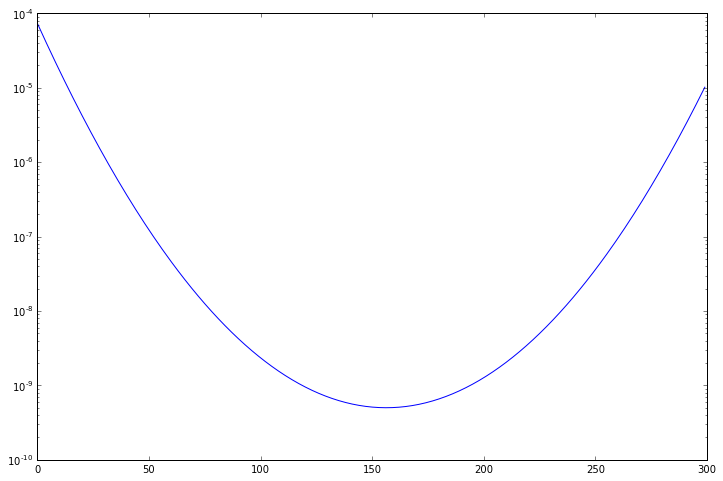

In [2]:
def NeelTime(H,K,r,t0_exp,theta):
    V = 4/3.0*np.pi*(r*10**-9)**3
    t0 = 10**t0_exp
    H_A = (2*K/70)*0.1934 #0.1934mT = 1 J/m^3 / 10^3 A/m * rho_Fe3O4
    #H_SW = H_A/((np.sin(theta)**(2))**(1/3.)+(np.cos(theta)**(2))**(1/3.))**(3/2.)
    H_SW = H_A/((np.sin(theta)+0j)**(2/3.)+(np.cos(theta)+0j)**(2/3.))**(3/2.)
    kappa = 0.86 + 1.14*H_SW/H_A
    E0 = K*V*np.power((1-H/H_SW+0j),kappa)
    return t0*np.exp(E0/(4.04*10**-21))

def PlotNeel(K,r,t0_exp,theta):
    h = np.arange(0,300,1)
    plt.semilogy(h,NeelTime(h,K,r,t0_exp,theta))
    
widgets.interact(PlotNeel,K=(10**4,4*10**4,10**2),r=(1,10,0.2),t0_exp=(-13,-8,0.1),theta=(0,2*np.pi,0.01))
NeelTime(100,26E3,3,-9,np.pi)

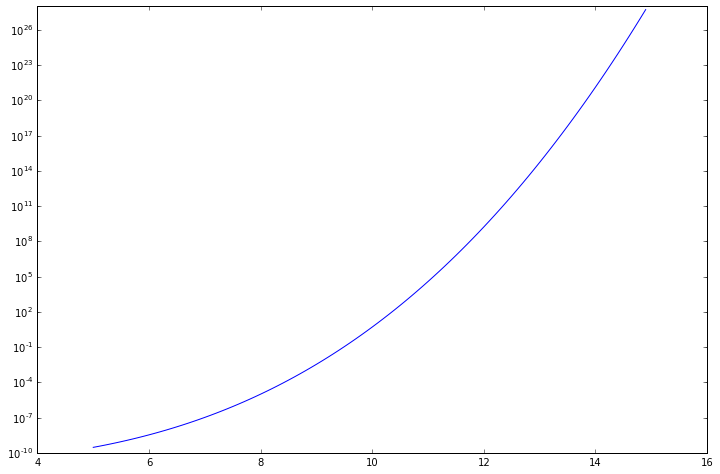

In [7]:
r = np.arange(5,15,0.1)
h=0
K=26000
t0_exp = -11
theta = 0
plt.semilogy(r,NeelTime(h,K,r,t0_exp,theta))

In [ ]:
def spec(t_exp):
    t_n = 10**t_exp
    f = np.logspace(5,10,2000)
    plt.semilogx(f,(2 * t_n)/(np.pi* (1+np.square(t_n*f))))

widgets.interact(spec,t_exp=(-12,12,0.1))

In [ ]:
def f(T1,t):
    return 2*T1/t**2*(t-T1+T1*np.exp(-t/T1))

def SE(tau,T1,B):
    return np.exp( -((28E6)**2 * B**2 * tau**2 * f(T1,tau)/2.) )

def plot_SE(T1_exp,B):
    ts = np.logspace(-9,0,100)
    plt.semilogx(ts,1-SE(ts,10**T1_exp,B),'k-')
    print (SE(1E-7,10**T1_exp,B),SE(5E-7,10**T1_exp,B),SE(1E-6,10**T1_exp,B))
    
widgets.interact(plot_SE,T1_exp=(-12,-8,0.1),B=(0,10,0.1))